In [1]:
!pip install --upgrade tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 69.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.31.0
    Uninstalling tensorflow-io-0.31.0:
      Successfully uninstalled tensorflow-io-0.31.0


In [2]:
import os
import itertools
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as mplt
from sklearn.model_selection import train_test_split
from concurrent.futures import ThreadPoolExecutor

In [3]:
img_array = mplt.imread("/kaggle/input/data/images_001/images/00000001_000.png")

In [4]:
img_array

array([[0.7921569 , 0.78039217, 0.7647059 , ..., 0.01960784, 0.00784314,
        0.        ],
       [0.78039217, 0.76862746, 0.7647059 , ..., 0.01960784, 0.00784314,
        0.        ],
       [0.76862746, 0.7607843 , 0.75686276, ..., 0.01960784, 0.00784314,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.99607843, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

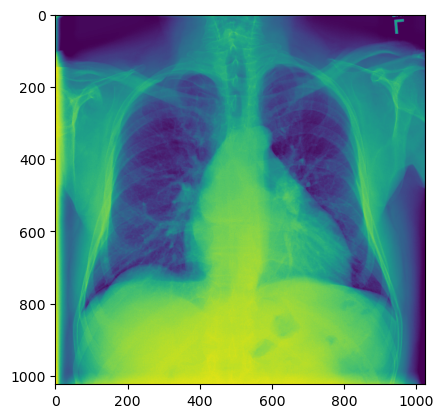

In [5]:
mplt.imshow(img_array)

In [6]:
data_dir_path = "/kaggle/input/data"

In [7]:
def get_folder_paths(data_dir_path):
    subdirectory_paths = []
    
    for root, dirs, files in os.walk(data_dir_path):
        for directory in dirs:
            img_dir_apth = os.path.join(root, directory)
            if os.path.basename(img_dir_apth) == 'images':
                subdirectory_paths.append(img_dir_apth)
                
    subdirectory_paths.sort()
    
    return subdirectory_paths

In [8]:
subdirectory_paths = get_folder_paths(data_dir_path)

In [9]:
subdirectory_paths

['/kaggle/input/data/images_001/images',
 '/kaggle/input/data/images_002/images',
 '/kaggle/input/data/images_003/images',
 '/kaggle/input/data/images_004/images',
 '/kaggle/input/data/images_005/images',
 '/kaggle/input/data/images_006/images',
 '/kaggle/input/data/images_007/images',
 '/kaggle/input/data/images_008/images',
 '/kaggle/input/data/images_009/images',
 '/kaggle/input/data/images_010/images',
 '/kaggle/input/data/images_011/images',
 '/kaggle/input/data/images_012/images']

In [10]:
len(subdirectory_paths)

12

In [11]:
def extract_img_paths_dict(dir_path):
    img_paths_dict = {}
    
    directory_name = os.path.dirname(dir_path)
    dir_name = os.path.basename(directory_name)
        
    img_paths_list = []
    
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            img_path = os.path.join(root, file)
            img_paths_list.append(img_path)

    img_paths_list.sort()
    img_paths_dict[dir_name] = img_paths_list

    return img_paths_dict

In [12]:
with ThreadPoolExecutor(max_workers=4) as pool:
    img_paths_dict_list = list(pool.map(extract_img_paths_dict, subdirectory_paths))

In [13]:
len(img_paths_dict_list)

12

In [14]:
imgs_paths_dict = {}
for img_paths_dict_item in img_paths_dict_list:
    imgs_paths_dict.update(img_paths_dict_item)

In [15]:
len(imgs_paths_dict)

12

In [16]:
len(imgs_paths_dict['images_001'])

4999

In [17]:
sum(len(lst) for lst in imgs_paths_dict.values())

112120

In [18]:
imgs_paths_dict

{'images_001': ['/kaggle/input/data/images_001/images/00000001_000.png',
  '/kaggle/input/data/images_001/images/00000001_001.png',
  '/kaggle/input/data/images_001/images/00000001_002.png',
  '/kaggle/input/data/images_001/images/00000002_000.png',
  '/kaggle/input/data/images_001/images/00000003_000.png',
  '/kaggle/input/data/images_001/images/00000003_001.png',
  '/kaggle/input/data/images_001/images/00000003_002.png',
  '/kaggle/input/data/images_001/images/00000003_003.png',
  '/kaggle/input/data/images_001/images/00000003_004.png',
  '/kaggle/input/data/images_001/images/00000003_005.png',
  '/kaggle/input/data/images_001/images/00000003_006.png',
  '/kaggle/input/data/images_001/images/00000003_007.png',
  '/kaggle/input/data/images_001/images/00000004_000.png',
  '/kaggle/input/data/images_001/images/00000005_000.png',
  '/kaggle/input/data/images_001/images/00000005_001.png',
  '/kaggle/input/data/images_001/images/00000005_002.png',
  '/kaggle/input/data/images_001/images/00

In [19]:
img_paths_df = pd.DataFrame(columns=['Image_Paths'])

In [20]:
for key, paths in imgs_paths_dict.items():
    
    path_data = pd.DataFrame({'Image_Paths': paths})
    
    img_paths_df = pd.concat([img_paths_df, path_data])

In [21]:
img_paths_df.reset_index(drop=True, inplace=True)

In [22]:
img_paths_df

,Image_Paths
0,/kaggle/input/data/images_001/images/00000001_...
1,/kaggle/input/data/images_001/images/00000001_...
2,/kaggle/input/data/images_001/images/00000001_...
3,/kaggle/input/data/images_001/images/00000002_...
4,/kaggle/input/data/images_001/images/00000003_...
...,...
112115,/kaggle/input/data/images_012/images/00030801_...
112116,/kaggle/input/data/images_012/images/00030802_...
112117,/kaggle/input/data/images_012/images/00030803_...
112118,/kaggle/input/data/images_012/images/00030804_...


# Custom Data Generator

In [23]:
bbox = pd.read_csv("/kaggle/input/data/BBox_List_2017.csv")
bbox = bbox.rename(columns = {'Bbox [x' : 'X',
                  'y' : 'Y',
                  'w' : 'Width',
                  'h]' : 'Height'})
bbox = bbox.iloc[:,:6]

In [24]:
bbox

,Image Index,Finding Label,X,Y,Width,Height
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695
...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778


In [25]:
data_entry_df = pd.read_csv("/kaggle/input/data/Data_Entry_2017.csv")

In [26]:
data_entry_df = data_entry_df.rename(columns={'OriginalImage[Width' : 'OriginalImageWidth',
                                   'Height]' : 'OriginalImageHeight',
                                   'OriginalImagePixelSpacing[x' : 'OriginalImagePixelSpacingX',
                                   'y]' : 'OriginalImagePixelSpacingY'})
data_entry_df = data_entry_df.drop('Unnamed: 11', axis=1)

In [27]:
data_entry_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacingX,OriginalImagePixelSpacingY
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168


In [28]:
unique_labels = list(set(itertools.chain.from_iterable(data_entry_df['Finding Labels'].apply(lambda x : x.split('|')))))

In [29]:
unique_labels

['Fibrosis',
 'Consolidation',
 'Cardiomegaly',
 'Mass',
 'Nodule',
 'Emphysema',
 'Effusion',
 'Atelectasis',
 'Pneumothorax',
 'Edema',
 'Pleural_Thickening',
 'Infiltration',
 'No Finding',
 'Hernia',
 'Pneumonia']

In [30]:
one_hot_labels = pd.DataFrame(0.0, index=np.arange(len(img_paths_df)), columns=unique_labels)

In [31]:
for index, rows in data_entry_df.iterrows():
    labels = rows['Finding Labels'].split('|')
    for label in labels:
        one_hot_labels.iloc[index][label] = 1.0

In [32]:
data = pd.concat([img_paths_df['Image_Paths'], data_entry_df.iloc[:, :2], one_hot_labels], axis=1)

In [33]:
data

,Image_Paths,Image Index,Finding Labels,Fibrosis,Consolidation,Cardiomegaly,Mass,Nodule,Emphysema,Effusion,Atelectasis,Pneumothorax,Edema,Pleural_Thickening,Infiltration,No Finding,Hernia,Pneumonia
0,/kaggle/input/data/images_001/images/00000001_...,00000001_000.png,Cardiomegaly,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/kaggle/input/data/images_001/images/00000001_...,00000001_001.png,Cardiomegaly|Emphysema,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/kaggle/input/data/images_001/images/00000001_...,00000001_002.png,Cardiomegaly|Effusion,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/kaggle/input/data/images_001/images/00000002_...,00000002_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/kaggle/input/data/images_001/images/00000003_...,00000003_000.png,Hernia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,/kaggle/input/data/images_012/images/00030801_...,00030801_001.png,Mass|Pneumonia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
112116,/kaggle/input/data/images_012/images/00030802_...,00030802_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
112117,/kaggle/input/data/images_012/images/00030803_...,00030803_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
112118,/kaggle/input/data/images_012/images/00030804_...,00030804_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
df_test = data[data['Image Index'].isin(bbox['Image Index'])]

In [35]:
df_test

,Image_Paths,Image Index,Finding Labels,Fibrosis,Consolidation,Cardiomegaly,Mass,Nodule,Emphysema,Effusion,Atelectasis,Pneumothorax,Edema,Pleural_Thickening,Infiltration,No Finding,Hernia,Pneumonia
151,/kaggle/input/data/images_001/images/00000032_...,00000032_037.png,Cardiomegaly|Edema|Infiltration,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
310,/kaggle/input/data/images_001/images/00000072_...,00000072_000.png,Atelectasis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,/kaggle/input/data/images_001/images/00000147_...,00000147_001.png,Atelectasis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,/kaggle/input/data/images_001/images/00000149_...,00000149_006.png,Atelectasis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,/kaggle/input/data/images_001/images/00000150_...,00000150_002.png,Atelectasis|Infiltration|Pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111704,/kaggle/input/data/images_012/images/00030606_...,00030606_006.png,Emphysema|Pneumothorax,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
111791,/kaggle/input/data/images_012/images/00030634_...,00030634_000.png,Effusion,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111793,/kaggle/input/data/images_012/images/00030635_...,00030635_001.png,Atelectasis|Effusion,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111807,/kaggle/input/data/images_012/images/00030636_...,00030636_004.png,Atelectasis|Infiltration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
for idx in df_test.index:
    data = data.drop(idx, axis=0)

In [37]:
data.reset_index(drop=True, inplace=True)
data

,Image_Paths,Image Index,Finding Labels,Fibrosis,Consolidation,Cardiomegaly,Mass,Nodule,Emphysema,Effusion,Atelectasis,Pneumothorax,Edema,Pleural_Thickening,Infiltration,No Finding,Hernia,Pneumonia
0,/kaggle/input/data/images_001/images/00000001_...,00000001_000.png,Cardiomegaly,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/kaggle/input/data/images_001/images/00000001_...,00000001_001.png,Cardiomegaly|Emphysema,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/kaggle/input/data/images_001/images/00000001_...,00000001_002.png,Cardiomegaly|Effusion,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/kaggle/input/data/images_001/images/00000002_...,00000002_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/kaggle/input/data/images_001/images/00000003_...,00000003_000.png,Hernia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111235,/kaggle/input/data/images_012/images/00030801_...,00030801_001.png,Mass|Pneumonia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111236,/kaggle/input/data/images_012/images/00030802_...,00030802_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
111237,/kaggle/input/data/images_012/images/00030803_...,00030803_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
111238,/kaggle/input/data/images_012/images/00030804_...,00030804_000.png,No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
df_train, df_val = train_test_split(data, test_size=0.2, random_state=42)

In [40]:
def training_data_generator(df_train, mb_size=288):
    batches = [df_train[i:i+mb_size] for i in range(0, len(df_train), mb_size)]
    
    for batch in batches:
        images = []
        ohe_values_arrays = []
        
        for img_path in batch['Image_Paths']:
            image = Image.open(img_path).convert('RGB')
            image = np.array(image)
            
            image = tf.image.resize(image, size=(224, 224))
            image = tf.cast(image, dtype='float32')
            
            images.append(image)
        
        images = np.array(images)
        
        one_hot_columns = batch.columns[3:]
        
        for path in batch['Image_Paths']:
            ohe_values = batch[batch['Image_Paths'] == path][one_hot_columns].iloc[0]
            ohe_values_arrays.append(ohe_values.values)
            
        one_hot_arrays = np.array(ohe_values_arrays)
        
        yield (1/255.0) * images, one_hot_arrays

In [41]:
X_train_mb, Y_train_mb = training_data_generator(df_train, 8).__next__()

In [42]:
X_train_mb.shape

(8, 224, 224, 3)

In [43]:
Y_train_mb

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

['No Finding', 'Consolidation', 'Mass', 'Nodule', 'Atelectasis', 'Effusion', 'Fibrosis', 'Pneumonia', 'Edema', 'Cardiomegaly', 'Hernia', 'Infiltration', 'Pneumothorax', 'Pleural_Thickening', 'Emphysema']

In [44]:
def val_data_generator(df_val, mb_size=108):
    batches = [df_val[i:i+mb_size] for i in range(0, len(df_val), mb_size)]
    
    for batch in batches:
        images = []
        ohe_values_arrays = []
        
        for img_path in batch['Image_Paths']:
            image = Image.open(img_path).convert('RGB')
            image = np.array(image)
            
            image = tf.image.resize(image, size=(224, 224))
            image = tf.cast(image, dtype='float32')
            
            images.append(image)
        
        images = np.array(images)
        
        one_hot_columns = batch.columns[3:]
        
        for path in batch['Image_Paths']:
            ohe_values = batch[batch['Image_Paths'] == path][one_hot_columns].iloc[0]
            ohe_values_arrays.append(ohe_values.values)
            
        one_hot_arrays = np.array(ohe_values_arrays)
        
        yield (1/255.0) * images, one_hot_arrays

In [45]:
import tensorflow as tf
from keras.applications import VGG16
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.losses import BinaryCrossentropy
from keras.metrics import Accuracy, Precision, Recall
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [46]:
vgg16_cnn = VGG16(include_top=False, input_shape=(224,224,3,))

58889256/58889256 [==============================] - 0s 0us/step


In [47]:
vgg16_cnn.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
for layer in vgg16_cnn.layers:
    layer.trainable = False

for layer in vgg16_cnn.layers[-2:]:
    layer.trainable = True

In [49]:
def create_custom_head():
    
    flattened = Flatten()(vgg16_cnn.output)
    dense1 = Dense(units=512, activation='relu')(flattened)
    output = Dense(units=15, activation='sigmoid')(dense1)
    
    model = Model(inputs=vgg16_cnn.input, outputs=output)
    
    return model

In [50]:
vgg_model = create_custom_head()

In [51]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [52]:
epochs = 10
optimizer = Adam()
binary_crossentropy = BinaryCrossentropy()
train_accuracy_metric = Accuracy()
train_precision_metric = Precision()
train_recall_metric = Recall()

val_accuracy_metric = Accuracy()
val_precision_metric = Precision()
val_recall_metric = Recall()
threshold = 0.5

In [53]:
@tf.function
def training_step(X_train_mb, Y_train_mb):
    with tf.GradientTape() as Tape:
        y_pred = vgg_model(X_train_mb, training=True)
        loss_func_value = binary_crossentropy(Y_train_mb, y_pred)
        
    grads = Tape.gradient(loss_func_value, vgg_model.trainable_weights)
    optimizer.apply_gradients(zip(grads, vgg_model.trainable_weights))
    
    return y_pred, loss_func_value

In [ ]:
for epoch in range(epochs):
    for X_train_mb, Y_train_mb in training_data_generator(df_train):
        
        y_pred, loss_func_value = training_step(X_train_mb, Y_train_mb)
        y_pred_binary = tf.where(y_pred >= threshold, 1.0, 0.0)
        
        train_accuracy_metric.update_state(y_true=Y_train_mb, y_pred=y_pred_binary)
        train_precision_metric.update_state(y_true=Y_train_mb, y_pred=y_pred_binary)
        train_recall_metric.update_state(y_true=Y_train_mb, y_pred=y_pred_binary)
        
    training_acc = train_accuracy_metric.result()
    training_pre = train_precision_metric.result()
    training_rec = train_recall_metric.result()
    
    print("Epoch # {}, BCEL value = {}".format((epoch+1), loss_func_value))
    print("Epoch # {}, Accuracy = {}, Precision = {}, Recall = {}".format((epoch+1), training_acc, training_pre, training_rec))
    
    train_accuracy_metric.reset_state()
    train_precision_metric.reset_state()
    train_recall_metric.reset_state()
    
    for X_val_mb, Y_val_mb in val_data_generator(df_val):
        val_y_pred = vgg_model(X_val_mb)
        val_y_pred_binary = tf.where(val_y_pred >= threshold, 1.0, 0.0)
        val_loss_func_value = binary_crossentropy(Y_val_mb, val_y_pred)

        val_accuracy_metric.update_state(y_true=Y_val_mb, y_pred=val_y_pred_binary)
        val_precision_metric.update_state(y_true=Y_val_mb, y_pred=val_y_pred_binary)
        val_recall_metric.update_state(y_true=Y_val_mb, y_pred=val_y_pred_binary)

    val_acc = val_accuracy_metric.result()
    val_pre = val_precision_metric.result()
    val_rec = val_recall_metric.result()

    print("Epoch # {}, val_BCEL value = {}".format((epoch+1), val_loss_func_value))
    print("Epoch # {}, val_Accuracy = {}, val_Precision = {}, val_Recall = {}\n\n".format((epoch+1), val_acc, val_pre, val_rec))

    val_accuracy_metric.reset_state()
    val_precision_metric.reset_state()
    val_recall_metric.reset_state()

Epoch # 1, BCEL value = 0.21196869015693665
Epoch # 1, Accuracy = 0.928482711315155, Precision = 0.6493629217147827, Recall = 0.31380966305732727


    Epoch # 1, BCEL value = 0.21260681748390198
    Epoch # 1, Accuracy = 0.9317789077758789, Precision = 0.6915146112442017, Recall = 0.3318246304988861
    Epoch # 1, val_BCEL value = 0.23309804499149323
    Epoch # 1, val_Accuracy = 0.9319309592247009, val_Precision = 0.6889708042144775, val_Recall = 0.34654876589775085
    
    Epoch # 1, BCEL value = 0.21001923084259033
    Epoch # 1, Accuracy = 0.9287501573562622, Precision = 0.6526876091957092, Recall = 0.315387099981308
    Epoch # 1, val_BCEL value = 0.22609342634677887
    Epoch # 1, val_Accuracy = 0.9318230748176575, val_Precision = 0.6914955377578735, val_Recall = 0.3409155607223511